 **PA005: High Value Customers Identification (Insiders)**

# SOLUTION PLANNING (IOT) 


## Input

1. Problema de negocio
    - Selecionar os clientes mais valiosos para integrar programa de fidelizacao **INSIDERS** 
    
    
2. Conjunto de dados
    - Vendas de um e-commerce online, durante o periodo de um ano (Nov 2015 - Dec 2017) 

## Output

1. Indicação dos clientes que farao parte dos **INSIDER**
    - Lista: 
              |client ID |is_insider |
              |1203      | yes       |
              |...       |...        |
             
            
2. Relatorio com as perguntas de negocio
    - Quem sao as pessoas elegiveis para participar do programa?
    - Quantos clientes farao parte do grupo?
    - Quais as principais caracteristicas desses clientes?
    - Qual a porcentagem de contribuicao do faturamento vinda dos insiders?
    - Qual a expectativa de faturamento desse grupo para os proximos meses?
    - Quais as condicoes para uma pessoa ser elegivel ao Insiders?
    - Quais as condicoes para uma pessoa ser removida do Insiders?
    - Qual a garantia que o programa Insiders é melhor que o restante da base?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento? 


## Tasks

**1.  Quem sao as pessoas elegiveis para participar do programa?** <br>
    
   - O que é ser elegivel? o que sao clientes de maior valor? 
   - Faturamento:
        - Alto ticket medio
        - Alto LTV
        - Baixa Recencia
        - Alto basket size
        - Baixa probabilidade de churn
        - Alta previsao LTV
        - Alta propensao de compra
        
   - Custo:
        - Baixa taxa de devolucao 
    
   - Baixa taxa de devolucao
        - Media das avaliações
        
        
**2.  Quantos clientes farao parte do grupo?**
   - Nro de clientes
   - % do nro total de clientes farão parte do insiders 
    
    
**3.  Quais as principais caracteristicas desses clientes?**
   - Escrever caracteristicas do cliente:
        - Idade
        - Pais
        - Salario
    
   - Escrever caracteristicas do consumo:
        - Atributos da clusterizacao
        
        
        
**4.  Qual a porcentagem de contribuicao do faturamento vinda dos insiders?**
   - Faturamento total da emprea
   - Faturamento do grupo Insiders
    

**5.  Qual a expectativa de faturamento desse grupo para os proximos meses?**
   - LTV do grupo Insiders
   - Analise de cohort
    
    
**6.  Quais as condicoes para uma pessoa ser elegivel ao Insiders?**
   - Definir a periodicidade que o modelo sera atualizado 
   - Para ser elegivel a pessoa precisa parecer com uma pessoa do grupo de Insiders
    
    
**7.  Quais as condicoes para uma pessoa ser removida do Insiders?**
   - Definir a periodicidade que o modelo sera atualizado  
   - Para deixar de ser elegivel a pessoa deve deixar de ser parecida com o grupo dos Insiders
    
    
**8.  Qual a garantia que o programa Insiders é melhor que o restante da base?**
   - Teste A/B
   - Teste A/B Bayesiano
   - Teste de hipotese


**9.  Quais ações o time de marketing pode realizar para aumentar o faturamento?** 
   - Desconto
   - preferencia de compra
   - frete
   - visita a empresa


## Benchmark de solucoes

### Desk research

- Modelo RFM

# IMPORTS

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
from IPython.display import HTML
import re
from sklearn import cluster as c 
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics as m
from plotly import express as px 

## Helper functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.options.display.float_format = '{:.2f}'.format
    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
path = '../data/raw/ecommerce.csv'

df_raw = pd.read_csv (path)

In [5]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN


## Data Cleaning

In [6]:
df = df_raw.copy()

In [7]:
df = df.drop(columns=['Unnamed: 8'], axis=1)

# DATA DESCRIPTION
***PASSO 1***

In [8]:
df1 = df.copy()

## Columns Description

|column|description|
|:-----|:---------|
|invoice_no|identificador de uma compra realizada no ecommerce|
|stock_code|identificador unico do produto comprado|
|description|descricao do produto|
|quantity|quantidade|
|invoice_date|data da compra|
|unit_price|preço unitario do produto|
|customer_id|identificador do comprador|
|country|pais do comprador|

## Rename Columns

In [9]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
new_columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']

df1.columns = new_columns

In [11]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


## Data Dimensions

In [12]:
print('Number of rows:{}'.format(df1.shape[0]))
print('Number of rows:{}'.format(df1.shape[1]))

Number of rows:541909
Number of rows:8


## Data Types

In [13]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## Check NA

In [14]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [15]:
#customer_id
df1 = df1.dropna(subset=['customer_id'],axis=0)
print('Removed data from subset customer_id: {:.2f}%'.format(100*(1-(df1.shape[0]/df_raw.shape[0]))))

# description 
df1['description'] = df1['description'].fillna(0)

Removed data from subset customer_id: 24.93%


**'customer_id'** possui 135080 valores nulos de 541909 linhas do dataset. Escolhi excluir essas linhas nessa primeira iteração, porem outro tratamento sera dado a esses missing values. 

Alternativas invalidadas:<br>
- substituir por uma sequencia de valores a partir do valor maximo +1. Nao é possivel porque os valores de customer_id se repetem no dataset, e essa alternativa ira distorcer o comportamento analisado, ja que 'customer_id' sera usado na feature engineering
- substituir por 0. Mesmo problema anterior
    

**description** nao sera usado em etapas futuras nesse ciclo de estudo, e a substibuição dos missing values por zero, nao alterara o comportamento do fenomeno estudado a principio

## Change Dtypes

In [16]:
# invoice_no
df1['invoice_no'] = df1['invoice_no'].apply(lambda x: re.search('\d+', x).group(0))
df1['invoice_no'] = df1['invoice_no'].astype(int)

# invoice_date     
df1['invoice_date'] = pd.to_datetime(df1['invoice_date']).dt.strftime('%Y-%m-%d')
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])
# customer_id     
df1['customer_id'] = df1['customer_id'].astype(int)

In [17]:
df1.dtypes

invoice_no               int64
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## Descriptive Analysis

Para essa primeira iteração, nao sera realizada essa etapa

# FEATURE ENGINEERING
***PASSO 2***

In [18]:
df2 = df1.copy()

In [19]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


O nosso dataset é referente aos dados transacionais do ecommerce, e a granularidade é dada por stock_code/invoice_no, de modo que essa combinação nao se repete.<br>

Porem precisamos de metricas agregadas dos clientes para poder resolver esse problema de clusterizacao e definir os **Insiders**. Dado o modelo **RFM (recency-frequency-monetary)** estudado na desk research, derivarei suas metricas do dataset original para compor uma **tabela de atributos dos clientes**. Alem dessas metricas derivarei algumas daquelas propostas na etapa de planejamento:<br>
- Ticket medio 
- LTV
- Basket Size medio


In [20]:
# dataframe of unique 'customer_id' to be merged with
df_customers = df2.drop(columns= ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
                                  'unit_price', 'country'],axis=1).drop_duplicates(ignore_index=True)

df_customers.head()

df_customers.columns

Index(['customer_id'], dtype='object')

In [21]:
# recency - days since last purchase
df_recency = df2.groupby('customer_id')['invoice_date'].max().reset_index()
df_recency['recency'] = (df_recency['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency']]
df_recency.head()

df_customers = pd.merge(df_customers,df_recency, on='customer_id', how='left')
df_customers.head()

,customer_id,recency
0,17850,302
1,13047,31
2,12583,2
3,13748,95
4,15100,330


Na feature 'frequency' teve um trade-off relativo ao periodo. Na escolha que fiz, o periodo compreende a data da primeira compra e a data da ultima compra. Portanto, se um cliente faz muitas compras em um unico mes na base, passa a impressao de ser um comprador frequente, ja que nao se atribui o peso do churn nesse periodo. 

Se fosse escolhido o ano como periodo, por outro lado, um comprador recente, mas consistente ao longo de poucos meses, passaria a informação de um comprador pouco frequente dado o denominador ser muito maior. 

Vale entao entender como esta a distribuição de safras de compradores e de meses que permanecem comprando (persistencia), para avaliar melhor esse **trade-off** 

In [22]:
# frequency - total purchases/month
df2['year_month'] = df2['invoice_date'].dt.strftime('%Y-%m')
df_frequency = df2[['customer_id','year_month','invoice_no']].groupby(['customer_id','year_month']).nunique().reset_index()
df_frequency = df_frequency.groupby('customer_id')['invoice_no'].mean().reset_index()
df_frequency = df_frequency.rename (columns = {'invoice_no':'frequency'})
df_frequency.head()

df_customers = pd.merge(df_customers,df_frequency, on='customer_id', how='left')
df_customers.head()

,customer_id,recency,frequency
0,17850,302,17.50
1,13047,31,1.80
2,12583,2,1.50
3,13748,95,1.67
4,15100,330,2.00


In [24]:
# monetary or LTV - gross revenue/customer
df2['gross_revenue'] = df2['unit_price']*df2['quantity']
df_monetary = df2.groupby('customer_id')['gross_revenue'].sum().reset_index()
df_monetary = df_monetary.rename(columns = {'gross_revenue':'monetary'})

df_customers = pd.merge(df_customers,df_monetary, on='customer_id', how='left')


In [26]:
# average ticket - gross revenue / count distinct invoice no
df_avg_ticket = df2.groupby('customer_id').aggregate({'invoice_no':'nunique','gross_revenue':'sum'}).reset_index()
df_avg_ticket ['avg_ticket'] = df_avg_ticket['gross_revenue']/df_avg_ticket['invoice_no']
df_avg_ticket = df_avg_ticket.rename ( columns={'invoice_no':'purchases','gross_revenue':'monetary'})
df_avg_ticket = df_avg_ticket[['customer_id','avg_ticket']].copy()

df_customers = pd.merge(df_customers,df_avg_ticket, on='customer_id', how='left')


Encontrei quase 9k linhas com 'quantity' negativo e com isso, quando calculado o total de itens por consumidor, aparecem valores negativos ou nulos. Considerando que itens devolvidos resultam onus para o ecommerce, os clientes serao avaliados pelo saldo de itens realmente comprados, e portanto sera o somatorio simples de 'quantity'

In [25]:
# average basket Size - total number of items sold / count distinct invoice no 
df_avg_basket = df2.groupby('customer_id').aggregate({'quantity':'sum','invoice_no':'nunique'}).reset_index()
df_avg_basket['avg_basket'] = df_avg_basket['quantity']/df_avg_basket['invoice_no']
df_avg_basket = df_avg_basket[['customer_id','avg_basket']].copy()

df_customers = pd.merge(df_customers,df_avg_basket, on='customer_id', how='left')



In [27]:
# first_purchase_at - min invoice_date

In [27]:
print(df_customers.isna().sum())
df_customers.head()

customer_id    0
recency        0
frequency      0
monetary       0
avg_basket     0
avg_ticket     0
dtype: int64


,customer_id,recency,frequency,monetary,avg_basket,avg_ticket
0,17850,302,17.50,5288.63,48.37,151.10
1,13047,31,1.80,3079.10,75.28,171.06
2,12583,2,1.50,7187.34,278.28,399.30
3,13748,95,1.67,948.25,87.80,189.65
4,15100,330,2.00,635.10,9.67,105.85


In [29]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,year_month,gross_revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016-11,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016-11,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016-11,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom,2016-11,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom,2016-11,20.34


In [28]:
df2[df2['quantity']<=0].shape

(8905, 10)

# DATA FILTERING
***PASSO 3***

In [29]:
df3 = df_customers.copy()

# EXPLORATORY DATA ANALYSIS (EDA)
***PASSO 4***

In [30]:
df4 = df3.copy()

# DATA PREPARATION
***PASSO 5***

In [31]:
df5 = df4.copy()

# FEATURE SELECTION
***PASSO 6***

In [32]:
df6 = df5.copy()

# HYPERPARAMETER FINE-TUNNING
***PASSO 7***

In [69]:
X = df6.drop(columns=['customer_id', 'avg_basket', 'avg_ticket'])
X.head()

,recency,frequency,monetary
0,302,17.50,5288.63
1,31,1.80,3079.10
2,2,1.50,7187.34
3,95,1.67,948.25
4,330,2.00,635.10


Nessa primeira iteracao vou rodar apenas o RFM

## WSS (Within-Cluster Sum of Square)

WSS representa a compacidade de cada cluster, para cada numero de cluster criados (K). 

A escolha de K clusters é uma avaliação do analista, e aqui sera feita pelo metodo do cotovelo de forma *manual* e usando a bibliotexa *yellowbricks*

In [34]:
clusters = [2, 3, 5, 7, 9, 10]

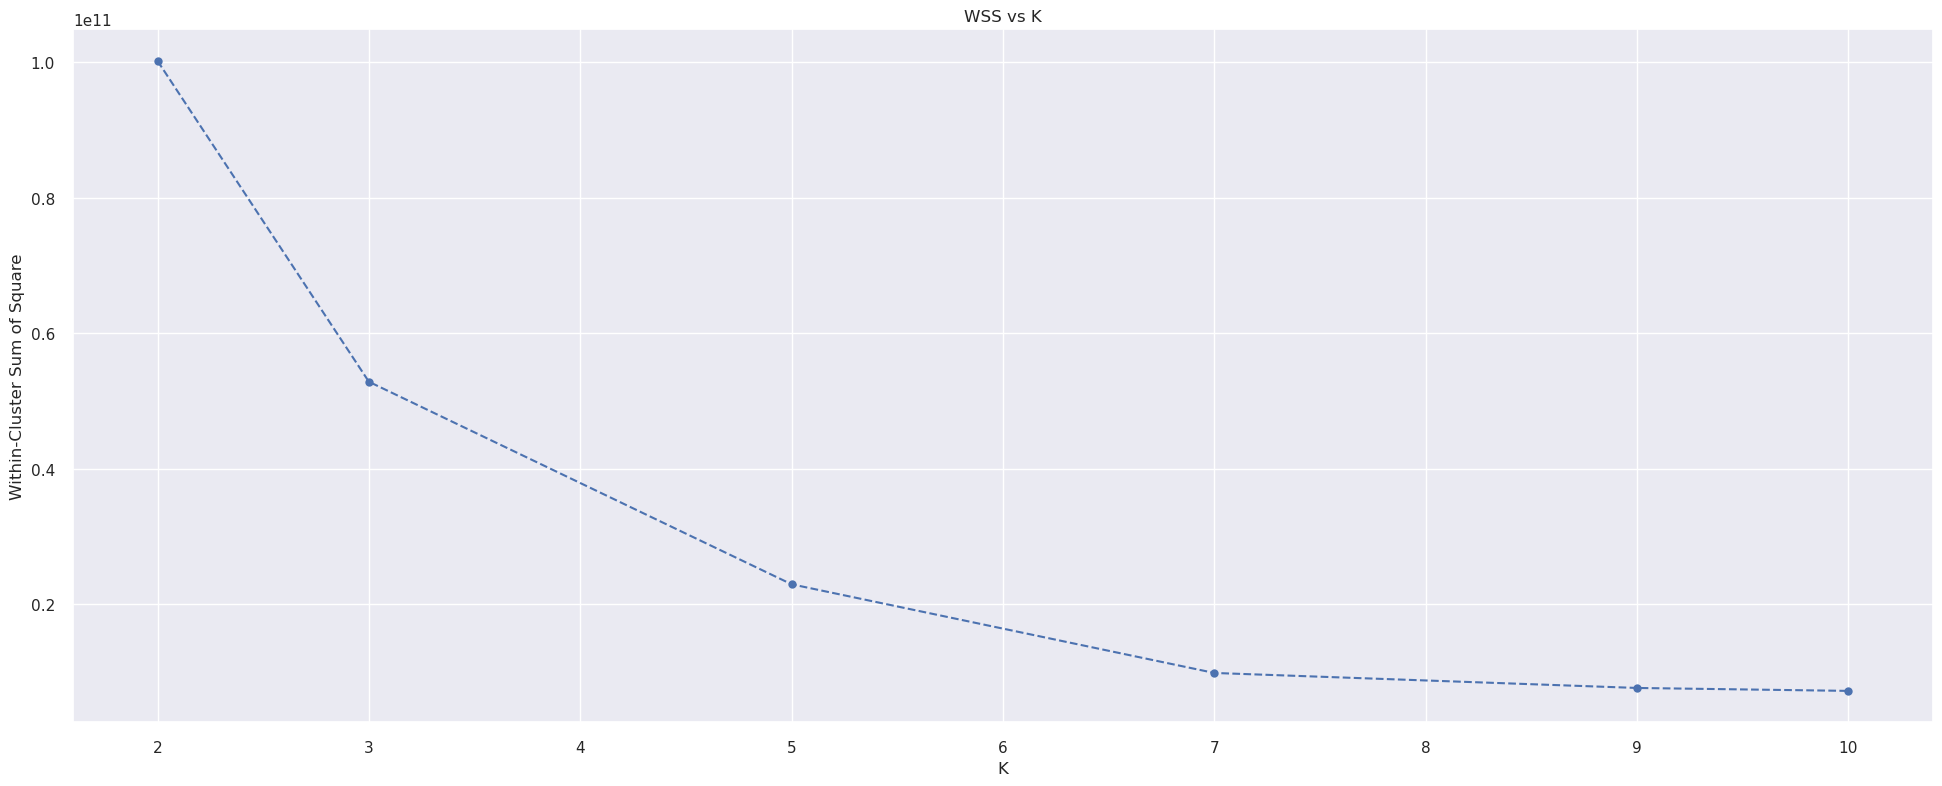

In [35]:
# Manual

# empty list to append values of wss for each k
wss = []

for k in clusters:
    # Instancing the model 
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter = 300, random_state=42)
    
    # Model training
    kmeans.fit(X)
    
    # Validation
    wss.append(kmeans.inertia_) 
    
# Plot WSS
plt.plot (clusters, wss, linestyle = '--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square');
plt.title('WSS vs K');

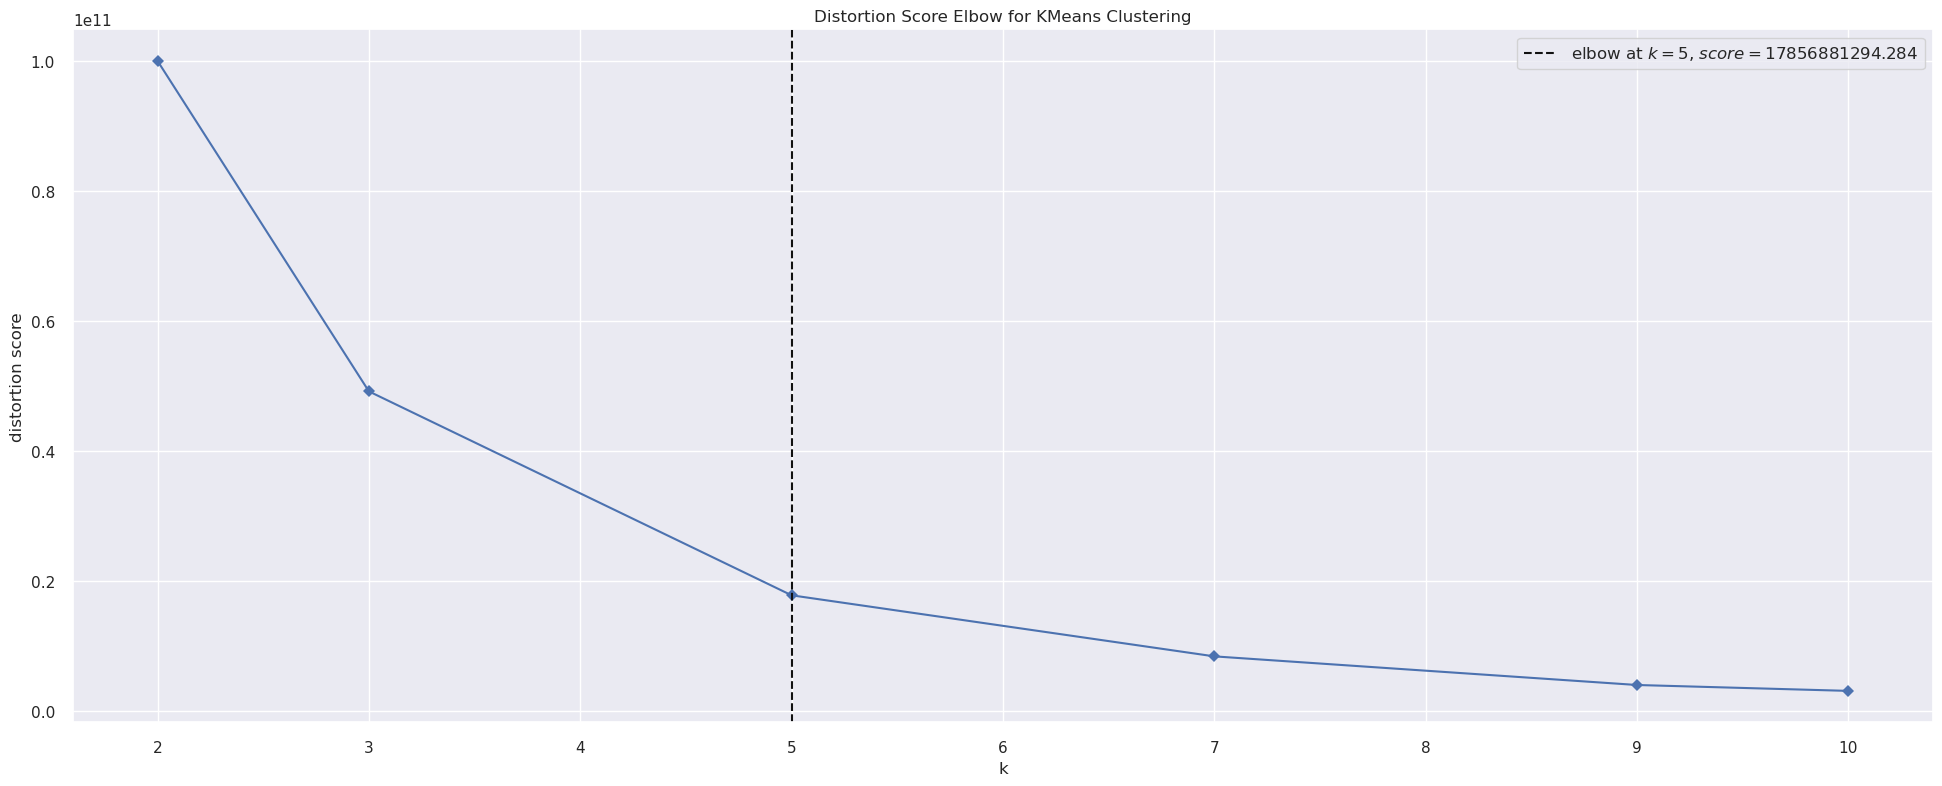

In [36]:
# Yellowbricks
kmeans = KElbowVisualizer(c.KMeans(), k=clusters,n_init=10 ,timings= False);
kmeans.fit(X);
kmeans.show();


In [37]:
wss

[100161127791.81432,
 52830178203.09854,
 22956087666.153202,
 9875503141.63544,
 7662729790.93346,
 7230611393.959745]

## Silhouete Score

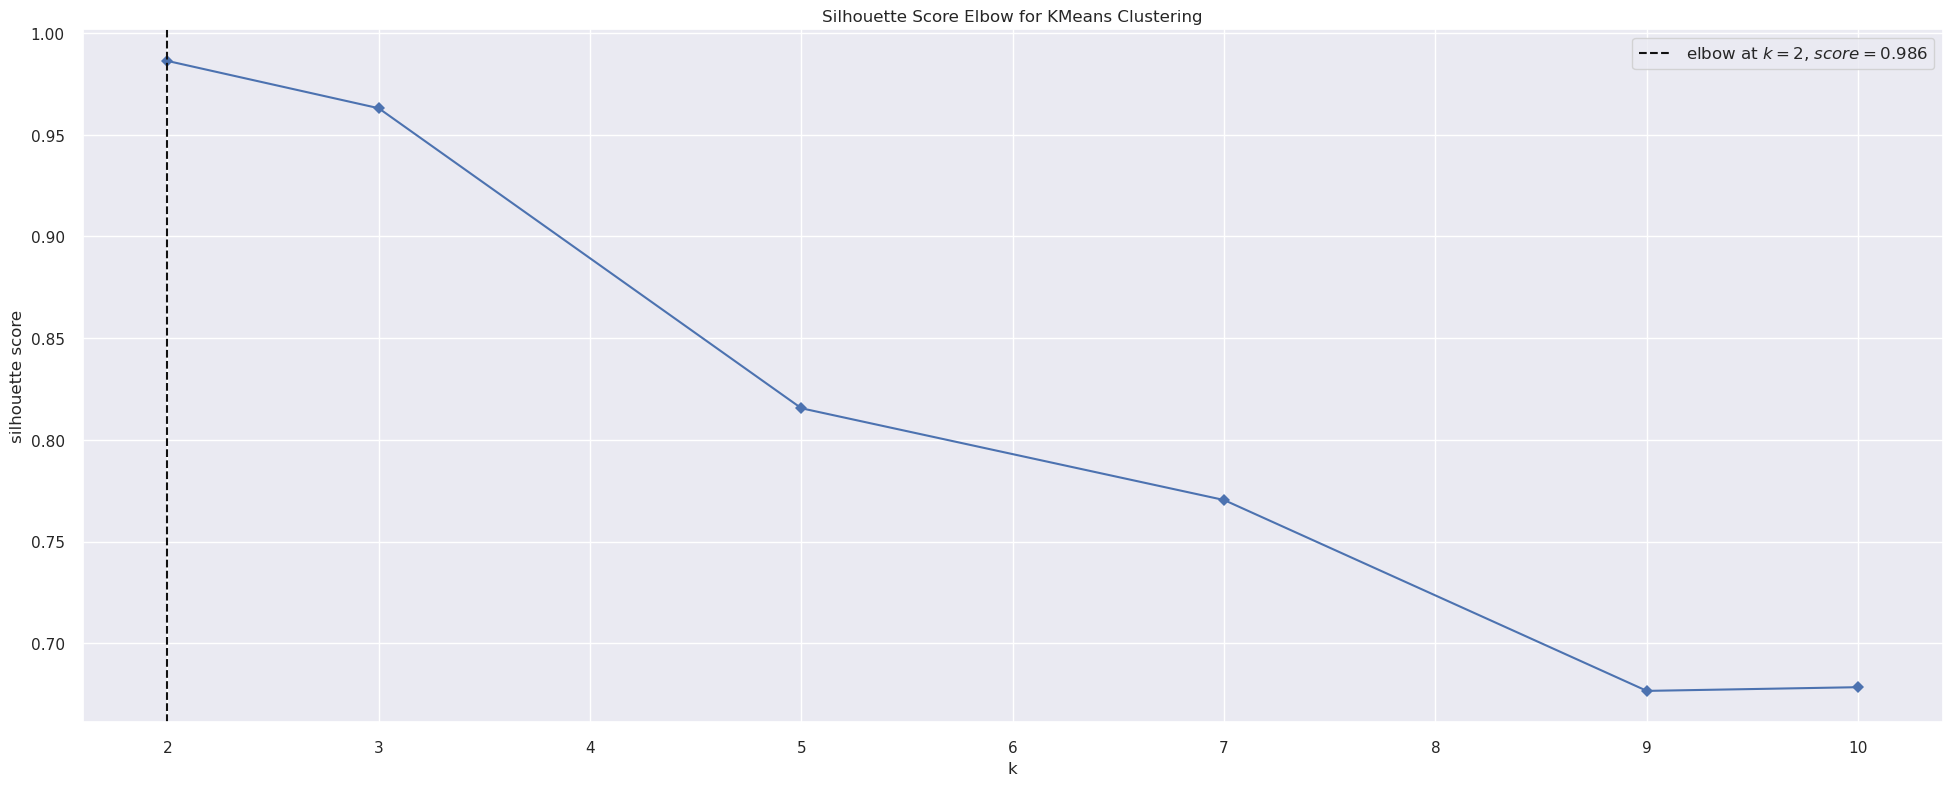

In [38]:

kmeans = KElbowVisualizer(c.KMeans(), k=clusters,n_init=10,metric='silhouette' ,timings= False);
kmeans.fit(X);
kmeans.show();

A silhueta representa tanto a compacidade do cluster, quanto a distancia entre eles. Quanto mais proximo de 1 diz que a razao entre a(1) e b(1) aproxima de zero, sendo:

- a(1): media da distancia entre ponto do cluster em relação aos demais do mesmo cluster
- b(1): media da distancia de um ponto em relaçao aos pontos do cluster vizinho mais proximo 



# MODEL TRAINING
***PASSO 8***

## K-Means

In [41]:
X.head()

,recency,frequency,monetary
0,302,17.50,5288.63
1,31,1.80,3079.10
2,2,1.50,7187.34
3,95,1.67,948.25
4,330,2.00,635.10


In [39]:
k = 3 
# Instancing the model 
kmeans = c.KMeans(init = 'random', n_clusters=k, n_init = 10, max_iter=300, random_state=42)

# Model Training
kmeans.fit(X)

# Labels
labels = kmeans.labels_

## Cluster validation

In [41]:
# WSS (Within-cluester Sum of Square)
print('WSS value: {}'.format(kmeans.inertia_))

# Silhoute Score
print('Silhouette Score: {}'.format (m.silhouette_score (X, labels, metric = 'euclidean')))

WSS value: 52830178203.09854
Silhouette Score: 0.9494682086172884


# CLUSTER ANALYSIS
***PASSO 9***

In [49]:
df9 = df6.drop(columns = ['avg_basket','avg_ticket']).copy()
df9['labels'] = labels.tolist()

In [51]:
df9.head()

,customer_id,recency,frequency,monetary,labels
0,17850,302,17.50,5288.63,0
1,13047,31,1.80,3079.10,0
2,12583,2,1.50,7187.34,0
3,13748,95,1.67,948.25,0
4,15100,330,2.00,635.10,0


## Visualization Inspection

In [58]:
labels.tolist()

In [55]:
fig = px.scatter_3d(df9, x='recency',y='frequency', z= 'monetary', color = 'labels')
fig.show()


## Cluster Profile

In [57]:
df9.head()

,customer_id,recency,frequency,monetary,labels
0,17850,302,17.50,5288.63,0
1,13047,31,1.80,3079.10,0
2,12583,2,1.50,7187.34,0
3,13748,95,1.67,948.25,0
4,15100,330,2.00,635.10,0


In [60]:
df_cluster

,labels,customer_id
0,0,4335
1,1,6
2,2,31


In [66]:
# Number of customers
df_cluster = df9[['customer_id', 'labels']].groupby('labels').count().reset_index()
df_cluster['perc_customer'] = (df_cluster['customer_id']/df_cluster['customer_id'].sum())*100

# Avg Monetary
df_avg_monetary = df9[['monetary','labels']].groupby('labels').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_monetary, how='inner', on = 'labels')

# Avg  Recency 
df_avg_recency = df9[['recency','labels']].groupby('labels').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency, how='inner', on = 'labels')

# Avg Frequency
df_avg_frequency = df9[['frequency','labels']].groupby('labels').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_frequency, how='inner', on = 'labels')

In [67]:
df_cluster

,labels,customer_id,perc_customer,monetary,recency,frequency
0,0,4335,99.15,1372.58,92.26,1.34
1,1,6,0.14,182181.98,7.17,6.84
2,2,31,0.71,40543.52,13.29,4.44


As features dos clusters foram agregadas pelos seus centroides, ou seja, as medias. Foram definidos 3 cluster, e o cluster 1 tem uma media de $183181, recencia media de 1 semana e frequencia de quase 7 compras/mês, sendo o cluster que mais performa nesse conjunto de dados

**Cluster 0**
- Numero de customers: 4335 (99.15%
- Recencia media: 92 dias
- Frequencia de compras por mes: 1 compra ao mes
- Receita media: 1372 
    
**Cluster 1 - Candidato a INSIDERS**
- Numero de customers: 6 (0.14%)
- Recencia media: 7 dias
- Frequencia de compras por mes: 7 compras ao mes
- Receita media: 182181

**Cluster 2**
- Numero de customers: 31 (0.71%)
- Recencia media: 13 dias
- Frequencia de compras por mes: 4 compras ao mes
- Receita media: 40543

# DEPLOY TO PRODUCTION
***PASSO 10***